In [1]:
#參考資料
#本報告嘗試找尋自駕車與死亡之相關原因
#希望能以大數據分析之方式，除為目前的交通環境作為參考之外，意可供日後自駕車與交通關係之設計作為參考

In [2]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLTK
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


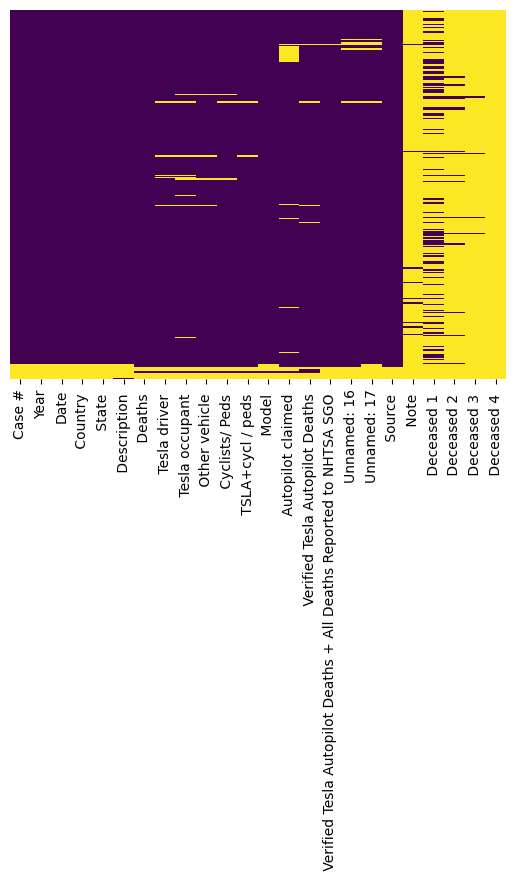

In [3]:
#使用資料夾內特斯拉的資料集，並使用HEATMAP查找闕漏資料
df = pd.read_csv(r'/kaggle/input/tesla-autonomous-deaths-data-updated-2023/Tesla Deaths - Deaths.csv')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.head(5)

In [4]:
#整理資料
#削去無意義資料

<AxesSubplot:>

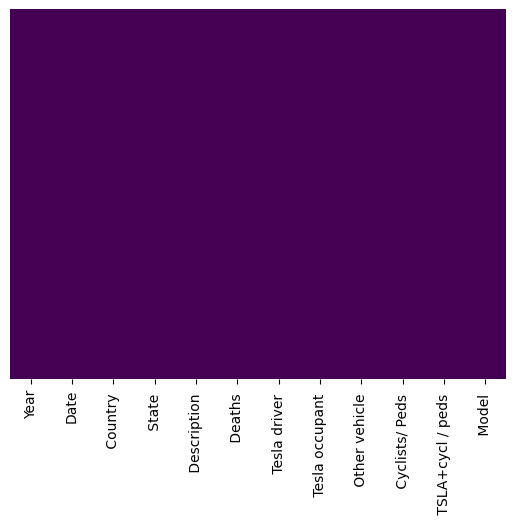

In [5]:

#1.取有意義的欄位
df = df.iloc[:,1:13]

#2.將空格填入"-"(補值)
for i in range(6,12):
    df[df.columns[i]] = df[df.columns[i]].fillna("-")

#3.刪去空白資料(關於case的資料)
df = df.dropna()

#4.使用HEATMAP確認缺漏資料
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#5.將空缺位補上"0",其他直維持不變
for i in range(6,12):
    for b in range(len(df)):
        if "-"in df[df.columns[i]].astype(str).values[b]:
            df[df.columns[i]].values[b] = 0
        else:
            df[df.columns[i]].values[b] = df[df.columns[i]].values[b]
df.head(5)

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model
0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,0
1,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,0,0,0,1,0
2,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,0
3,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,0
4,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,0,0,0,1,1,0


In [7]:
#打印圖表
#觀察"死亡數"與"時"、"地"之關係
#相關之預測

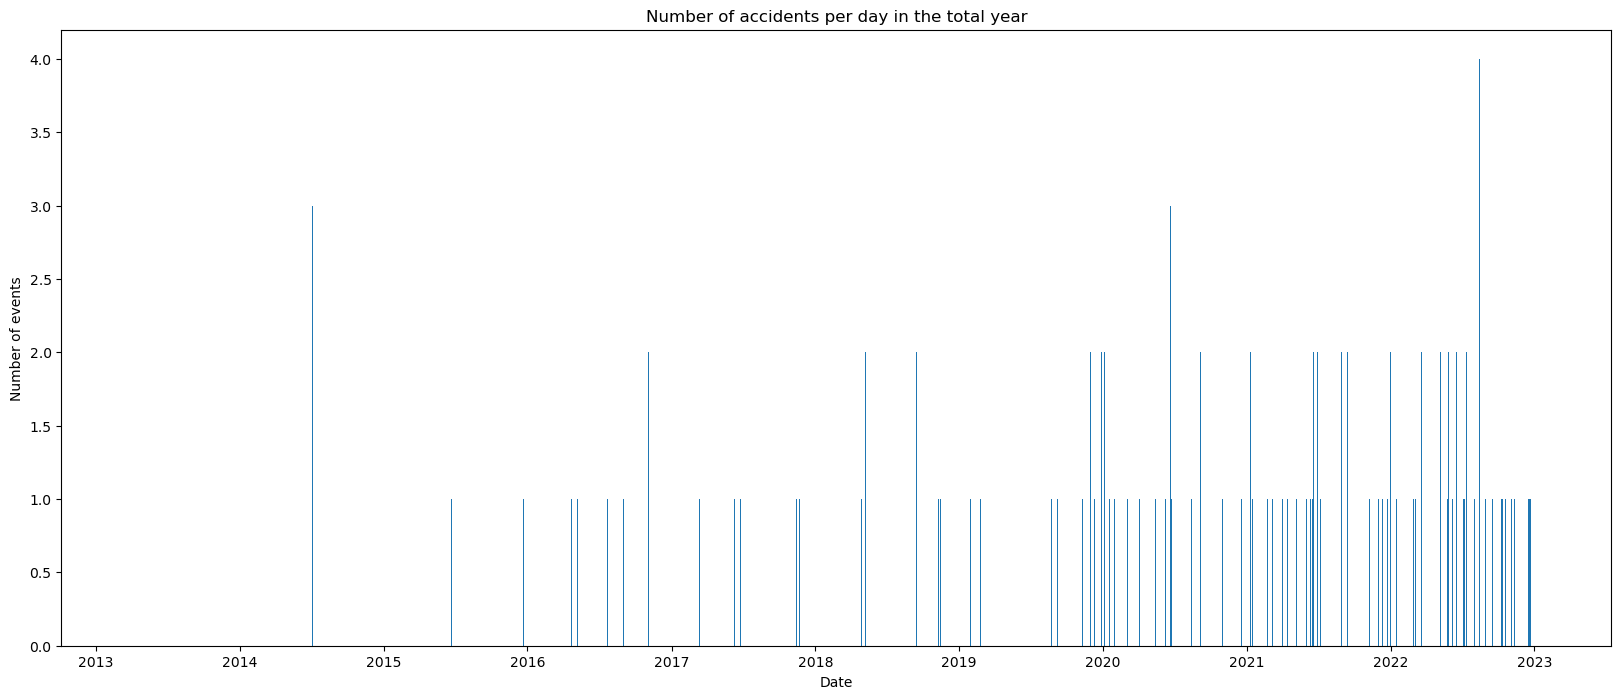

In [8]:
#1.將date資料格式轉換
#2.設定圖表:日期與死亡關係

df['Date']= pd.to_datetime(df['Date'])
x=df['Date']
y=df[' Deaths '].astype(int)

plt.figure(figsize=(20,8))
plt.title("Number of accidents per day in the total year")
plt.xlabel("Date")
plt.ylabel("Number of events")
plt.bar(x,y)

plt.show()

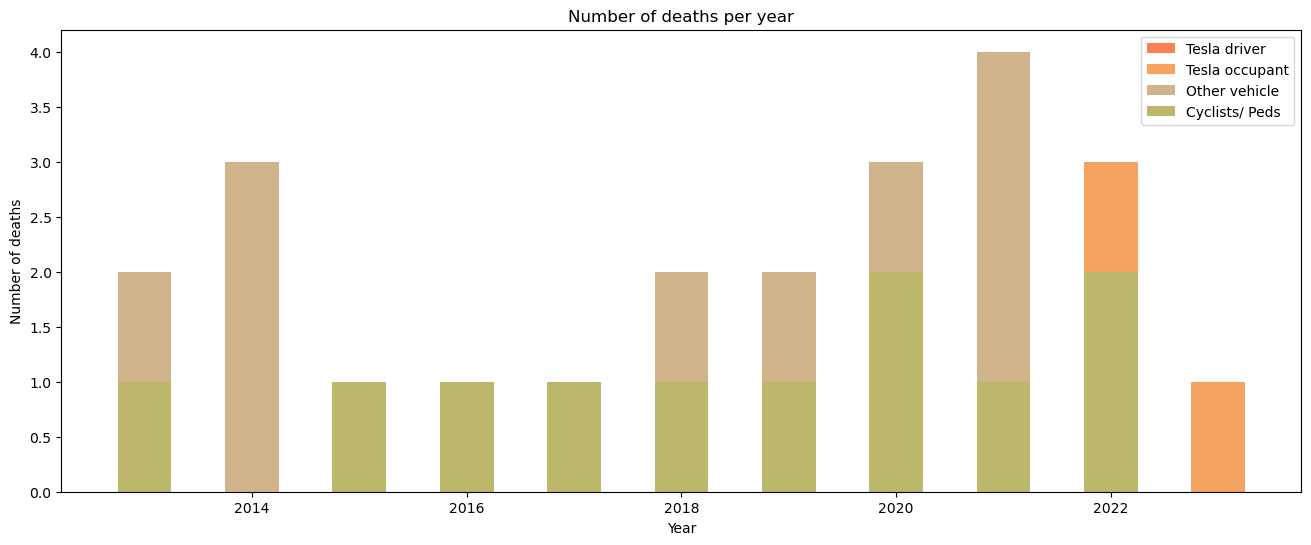

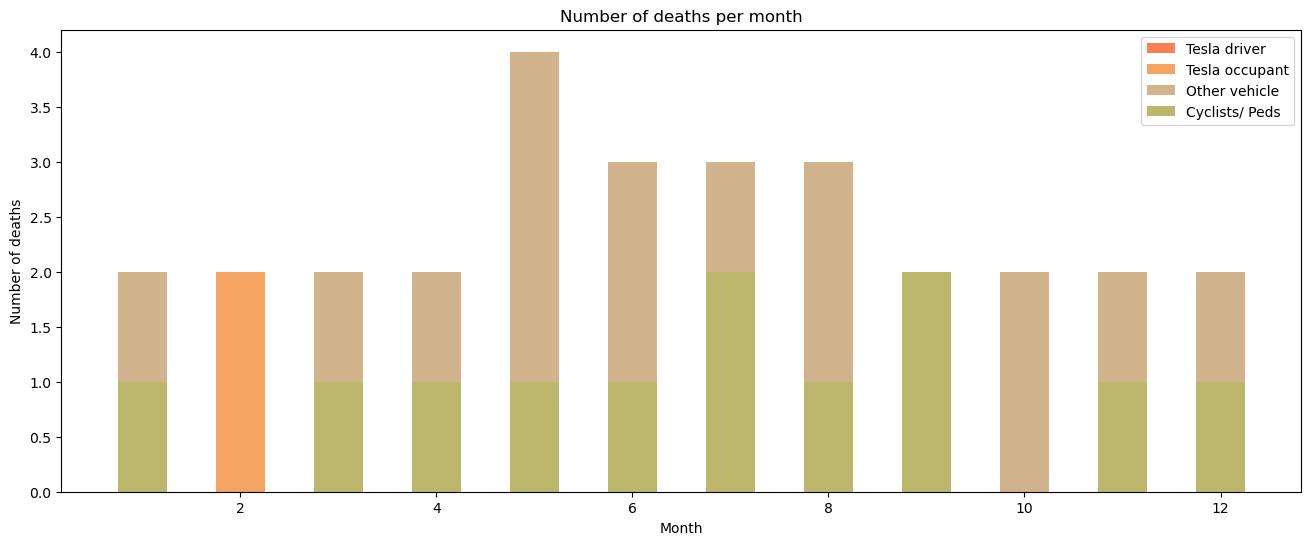

In [9]:
#1.將date資料格式轉換
#2.設定圖表:年分、月份與死亡關係

df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month

x=df['year']
a=df['month']
y=df[' Deaths '].astype(int)
z=df[' Tesla driver '].astype(int)
p=df[' Tesla occupant '].astype(int)
q=df[' Other vehicle '].astype(int)
r=df[' Cyclists/ Peds '].astype(int)

plt.figure(figsize=(16,6))
plt.title("Number of deaths per year")
plt.xlabel("Year")
plt.ylabel("Number of deaths")

plt.figure(1)   
plt.bar(x,z,color="coral",width=0.5,label = "Tesla driver")
plt.bar(x,p,color="sandybrown",width=0.5,label = "Tesla occupant")
plt.bar(x,q,color="tan",width=0.5,label = "Other vehicle")
plt.bar(x,r,color="darkkhaki",width=0.5,label = "Cyclists/ Peds ")
plt.legend()

plt.figure(figsize=(16,6))
plt.title("Number of deaths per month")
plt.xlabel("Month")
plt.ylabel("Number of deaths")

plt.figure(2)
plt.bar(a,z,color="coral",width=0.5,label = "Tesla driver")
plt.bar(a,p,color="sandybrown",width=0.5,label = "Tesla occupant")
plt.bar(a,q,color="tan",width=0.5,label = "Other vehicle")
plt.bar(a,r,color="darkkhaki",width=0.5,label = "Cyclists/ Peds ")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

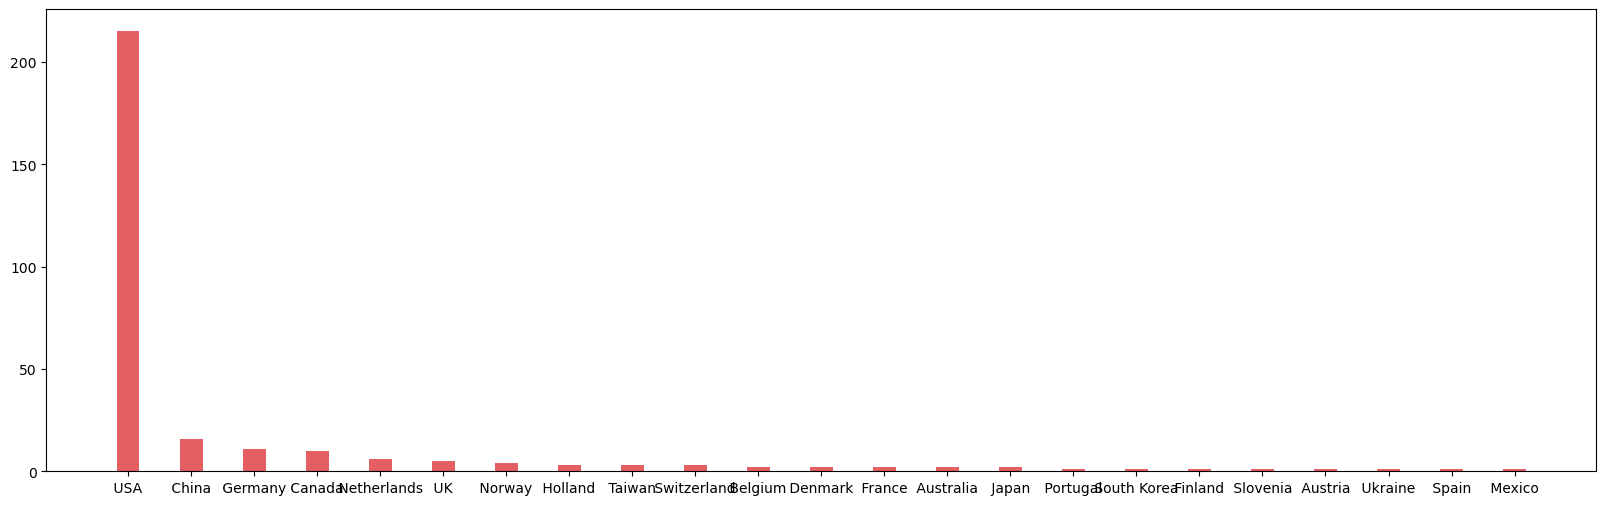

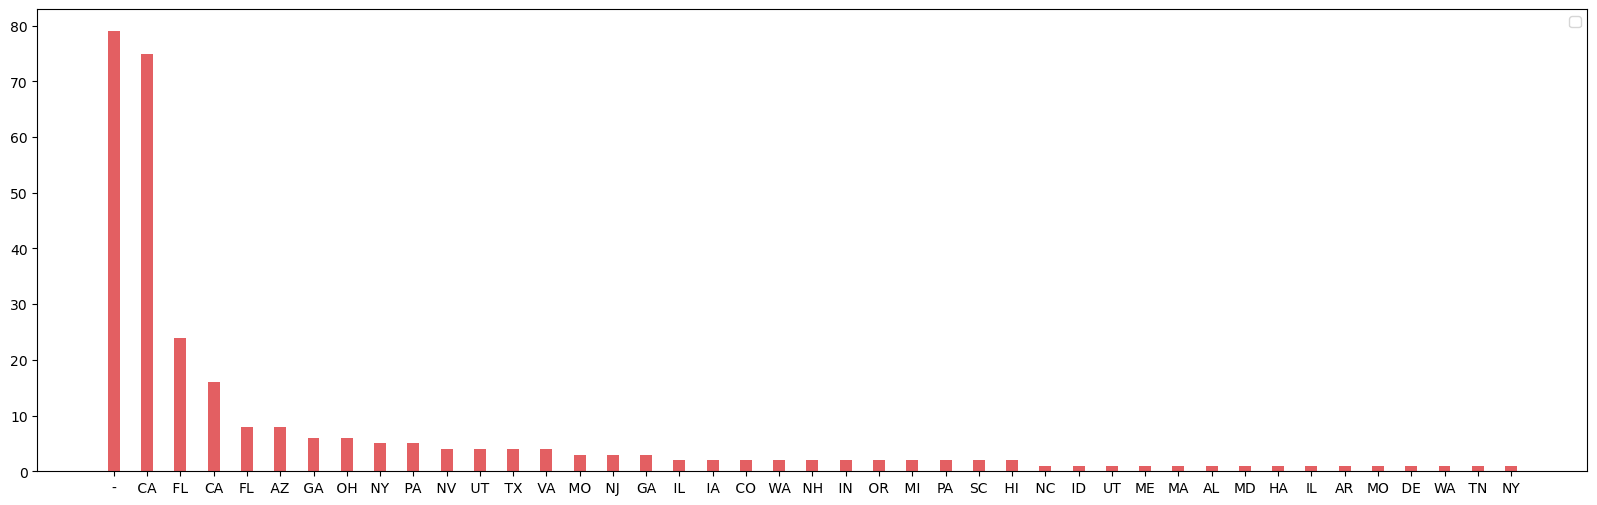

In [10]:
#1.將date資料格式轉換
#2.設定圖表:國家、州與死亡關係

x = df[" Country "].value_counts().index
y = df[" Country "].value_counts().values
a = df[" State "].value_counts().index
b = df[" State "].value_counts().values

plt.figure(1)
plt.figure(figsize=(20,6))
plt.bar(x,y,color='#e35f62',width=0.36)
plt.figure(2)
plt.figure(figsize=(20,6))
plt.bar(a,b,color='#e35f62',width=0.36)

plt.legend() 
plt.show()

In [11]:
#利用nltk找尋死亡原因
#發現不同的方式找尋相關之字詞關係亦有所不同
#找到事故原因並分析
#平測各種分析方式

In [12]:
#nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [13]:
# #利用wordnet查找同義字
# synonyms = []
# for syn in wordnet.synsets("crash"):
#     for i in syn.lemmas():
#         synonyms.append(i.name())

# print(set(synonyms))

In [14]:
#設定nltk模組
#欲歸類相同字詞

#3.分類詞性
#(1)使用 pos_tag 進行詞性標註
#(2)依NLTK POS Tag List歸類
#WordNet是面向語義的英語詞典，類似與傳統辭典，但具有更豐富的結構。
#NLTK中包括英語WordNet，共有155,287個詞和117,659個同義詞集合。
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1]                                        
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#2.將字詞的變化還原
#(1)使用 tokenize 進行斷詞(比split好用)
#(2)wnl.lemmatize詞性還原
def lemmatize_text(text):
    wnl = WordNetLemmatizer()                                                               
    return [wnl.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]
    
#1.讀取資料，並整理，再使用上述的functions
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值
#選取其index(也就是被刪掉重複的原本"description"之內容)，並以list傳出
data = df[" Description "].value_counts().index
lemmatized_data = [lemmatize_text(text) for text in data]

In [15]:
#整理單詞
#TFIDF是種將文字轉換為向量的方式。
#TFIDF分成兩個部份，TF和IDF。分別表示詞頻（term frequency，tf）和逆向檔案頻率（inverse document frequency，idf）。

#1.TFIDF用以找到文件當中的關鍵字。並去除無意義單詞(ex.the)
#2.自訂stop_words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
book=["Tesla","car","into","off","out","of","on"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(book)
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)
# vectorizer = TfidfVectorizer(stop_words='english')#去除停用詞
X = vectorizer.fit_transform([' '.join(text) for text in lemmatized_data])#用空白隔開字串(strings)
print(X.shape)

(248, 245)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['tesla'] not in stop_words.
  % sorted(inconsistent)


In [16]:
#去除相差太多的資料
#因發現原本只使用kmeans誤差有點多，經過去除特異值後，有些許改善

#1.利用LocalOutlierFactor查找Outlier
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
a = lof.fit_predict(X)

#2.利用布林值建立non_outlier_list與outlier_list
non_outlier_list = np.array([True if i == 1 else False for i in a])
outlier_list = np.array([True if not i else False for i in non_outlier_list])

#3.指定X(排除後的資料)與data(排除後的資料)
X = X[non_outlier_list]
data = data[non_outlier_list]
print(X.shape)

(245, 245)


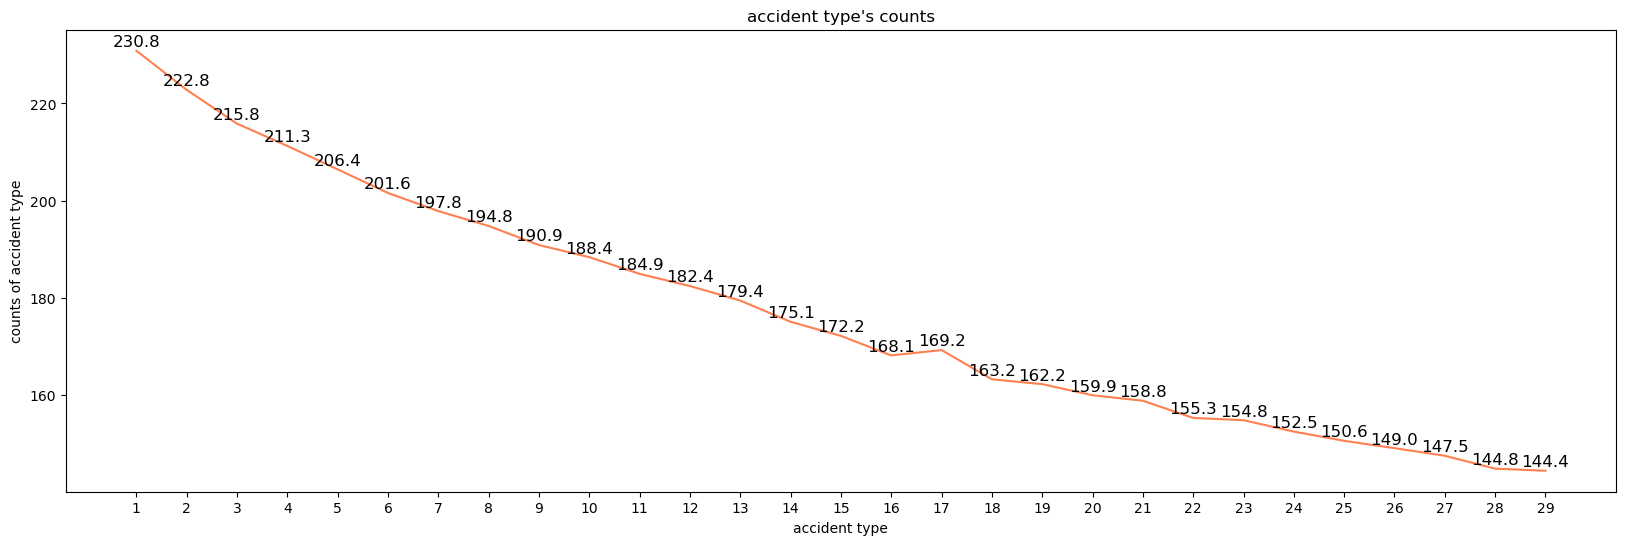

In [17]:
# k = 1~30 做9次kmeans, 並將每次結果的inertia收集在一個list裡
from sklearn.cluster import KMeans
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_list]

x = [str(i) for i in range(1,30)]
y = inertias

plt.figure(figsize=(20,6))
plt.title("accident type's counts")
plt.xlabel("accident type")
plt.ylabel("counts of accident type")  
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.plot(x,y,color='coral')

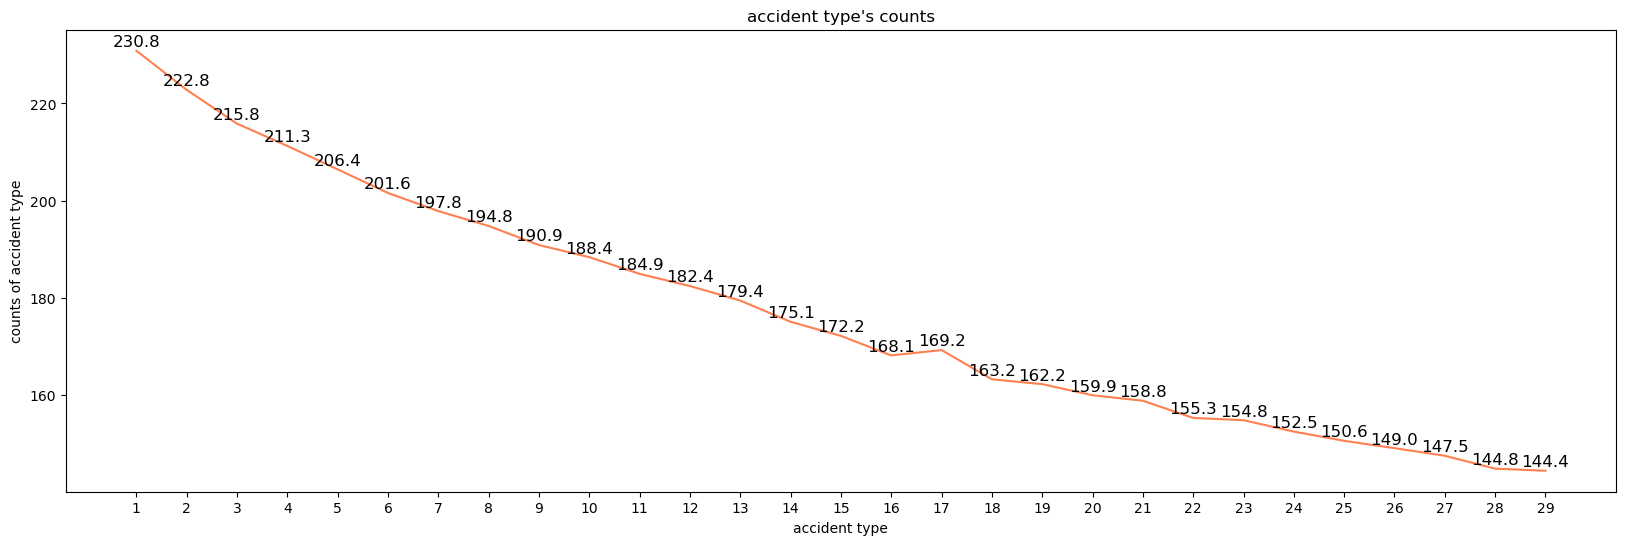

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:31]]
x = [str(i) for i in range(1,30)]
y = inertias

plt.figure(figsize=(20,6))
plt.title("accident type's counts")
plt.xlabel("accident type")
plt.ylabel("counts of accident type")  
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.plot(x,y,color='coral')

In [19]:
#利用KMeans機器學習分群
#可調整群數

from sklearn.cluster import KMeans

n_clusters=8
kmeans = KMeans(n_clusters = n_clusters, random_state=0)#分成五群原因
kmeans.fit(X)
clusters = kmeans.predict(X)
print(clusters)
print(clusters.shape)

[3 2 2 2 5 4 0 3 3 5 6 6 2 0 1 4 6 2 2 2 2 2 7 2 2 2 6 2 2 4 5 2 5 2 2 2 2
 3 6 6 2 2 3 0 4 3 4 0 5 3 3 3 3 2 0 2 3 0 2 2 3 2 3 2 3 2 3 3 2 2 2 6 2 2
 2 2 5 5 2 2 2 6 2 2 2 2 2 2 6 2 3 2 2 2 2 2 0 0 6 2 6 2 2 6 6 2 6 2 7 0 2
 6 2 2 6 2 5 5 2 6 2 6 6 4 0 2 3 5 3 4 2 3 5 3 2 2 3 7 3 3 2 5 3 2 3 0 2 1
 2 4 2 7 4 2 2 7 3 7 3 2 2 3 3 2 0 2 2 5 2 3 3 3 3 0 2 2 2 3 4 4 2 2 5 2 2
 2 7 3 1 3 3 3 0 3 0 4 3 2 3 4 2 2 0 3 3 3 0 2 5 2 4 2 2 3 0 4 1 3 1 7 2 7
 0 1 0 2 2 2 0 2 2 0 2 2 2 4 3 0 2 0 4 1 5 2 2]
(245,)


In [20]:
#貼上cluster欄位
#整理資料

df.loc[:, "cluster"] = 0
for i, item in enumerate(df[" Description "]):
    for cluster, phrase in zip(clusters, data):
        if phrase == item:
            df["cluster"][i] = cluster
            break
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,year,month,cluster
0,2022.0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,0,2023,1,2
1,2022.0,2023-01-07,Canada,-,Tesla crashes,1.0,1,0,0,0,1,0,2023,1,2
2,2022.0,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,0,2023,1,3
3,2022.0,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,0,2022,12,2
4,2022.0,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,0,0,0,1,1,0,2022,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2014.0,2014-07-14,USA,CA,Tesla kills motorcyclist,1.0,0,0,1,0,0,0,2014,7,2
290,2014.0,2014-07-04,USA,CA,Thief crashes stolen Tesla,1.0,1,0,0,0,1,0,2014,7,2
291,2014.0,2014-07-04,USA,CA,Tesla rear ends stopped car,3.0,0,0,3,0,0,0,2014,7,2
292,2013.0,2013-11-02,USA,CA,Tesla kills cyclist,1.0,0,0,0,1,1,0,2013,11,2


In [21]:
#查找再n_clusters裡的同一值
#把同一cluster值拽出來

#1.幫accident建立n_clusters個list
accident = [ [] for i in range(n_clusters)]

#2.刪去-1值(代表非群體，kmeans法中沒有-1)
#3.accident項目+data文字
accident_outlier = []
for i, cluster in enumerate(clusters):
    if cluster >=0:
        accident[cluster].append(data[i])
    else:
        accident_outlier.append(data[i])
        

<BarContainer object of 8 artists>

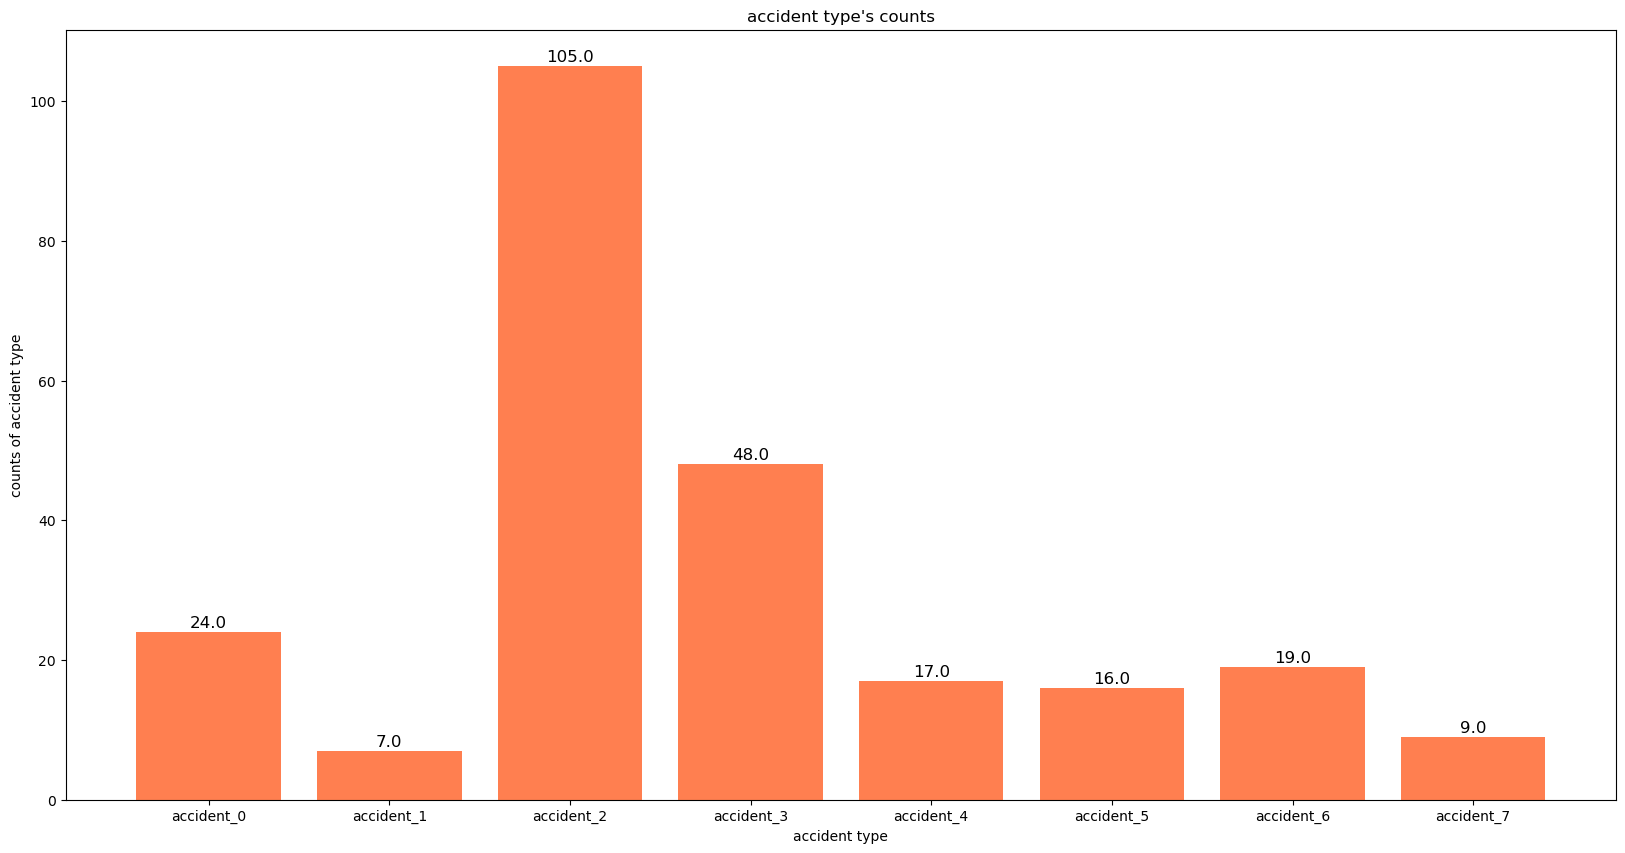

In [22]:
#做圖(長條圖)
#X為不同類型的accident
#y為不同類型的accident隻數量

x = ["accident_"+str(i) for i in range(n_clusters)]
y = [len(accident[i]) for i in range(n_clusters)]

plt.figure(figsize=(20,10))
plt.title("accident type's counts")
plt.xlabel("accident type")
plt.ylabel("counts of accident type")  
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    
plt.bar(x,y,color='coral')

In [23]:
#列出數量最多的群，並觀察
#代表事故最多的原因
print(accident[2][0:20])

[' Tesla kills motorcyclist ', ' Tesla into oncoming traffic ', ' Tesla rear ends stopped car ', ' Tesla kills cyclist ', ' Motorcyclist rear ends Tesla ', ' Tesla rear ends Ford ', ' Motorcycle crashes into Tesla ', ' Autopilot into 18 wheeler ', " Car drifts into Tesla's lane ", ' Tesla veers into other lane, crashes into oncoming car ', ' Vehicle collides with Tesla at intersection ', ' Motorcyclist killed in crash with Tesla ', ' Driver has heart attack and crashes Tesla ', ' Tesla goes off cliff and later found ', ' Tesla rolls over and catches on fire ', ' Driver dies as Tesla goes down embankment ', ' Nissan in front of Tesla loses control ', ' Tesla crashes into car at toll booth ', ' Sudden unintended acceleration kills store patron ', ' Tesla races other car, other car crashes ']


In [24]:
#列出數量最少的群，並觀察
#代表事故最少的原因
print(accident[1][0:20])

[' DUI crash ', ' Tesla DUI crash ', ' DUI crash with parked car ', ' Tesla DUI involving another vehicle ', ' Tesla DUI hits pedestrian ', ' DUI crash on highway, Tesla catches fire ', ' Multi-crash involving DUI ']


In [25]:
#計算正確率

#1.幫accident建立n_clusters個list
accident_score = [ [] for i in range(n_clusters)]

def get_score_list(accident_n,accident_n_score):
    for i in range(len(accident_n)):#對每一個元素做某一事
        for j in range(len(df[" Description "].value_counts().index)):
            if df[" Description "].value_counts().index[j] == accident_n[i]:#還沒lemmertize
                accident_n_score.append(df[" Description "].value_counts().values[j])#代表正確所以回傳
                
for i in range(n_clusters):
    get_score_list(accident[i], accident_score[i])


In [26]:
x = ["accident_"+str(i) for i in range(n_clusters)]
y = [sum(i)*len(i) for i in accident_score]
print(x)
print(y)

['accident_0', 'accident_1', 'accident_2', 'accident_3', 'accident_4', 'accident_5', 'accident_6', 'accident_7']
[648, 56, 12915, 2928, 340, 320, 418, 90]


<BarContainer object of 8 artists>

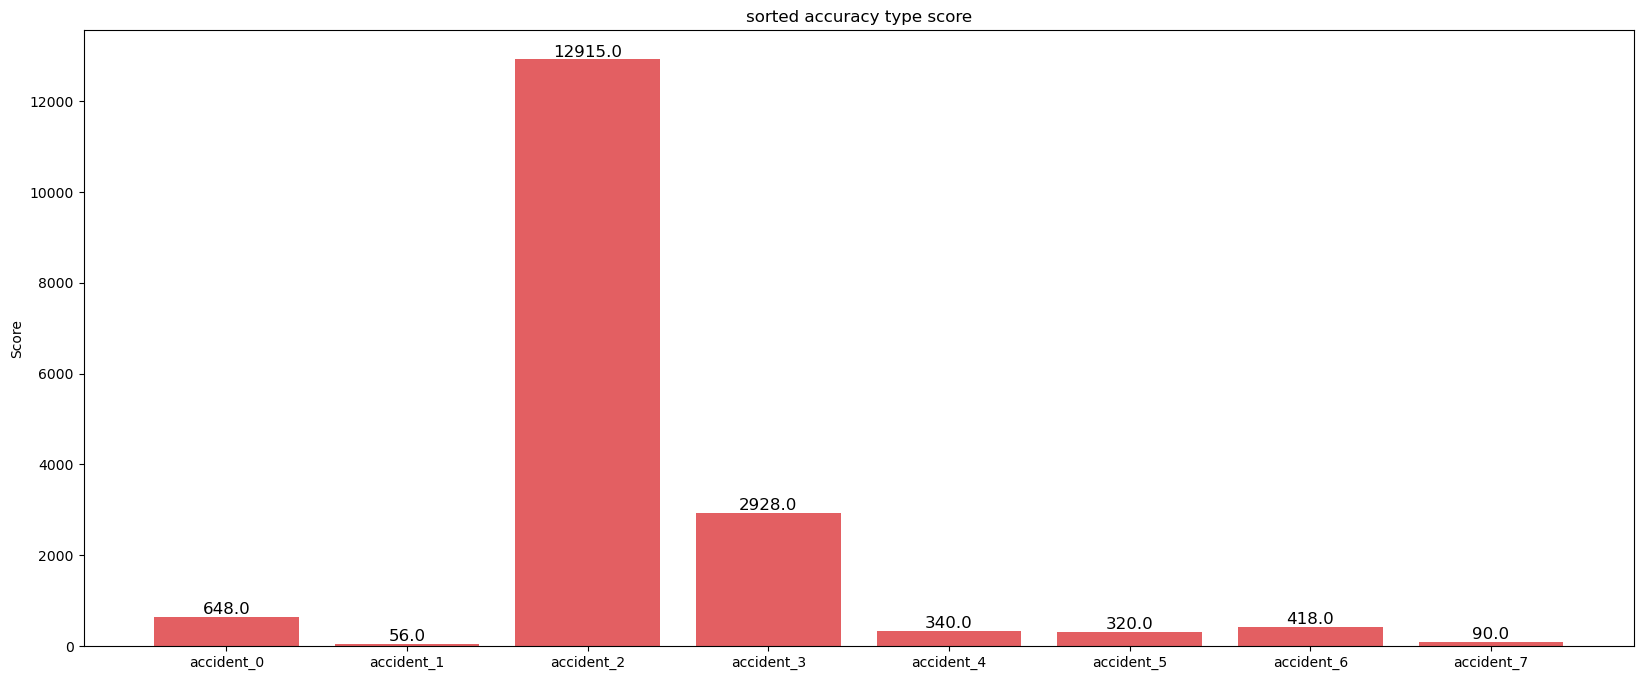

In [27]:

plt.figure(figsize=(20,8))
plt.ylabel("Score")
plt.title("sorted accuracy type score")
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.bar(x,y,color='#e35f62')

In [28]:
#設定nltk模組
#欲歸類相同字詞

#3.分類詞性
#(1)使用 pos_tag 進行詞性標註
#(2)依NLTK POS Tag List歸類
#WordNet是面向語義的英語詞典，類似與傳統辭典，但具有更豐富的結構。
#NLTK中包括英語WordNet，共有155,287個詞和117,659個同義詞集合。
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1]                                        
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#2.將字詞的變化還原
#(1)使用 tokenize 進行斷詞(比split好用)
#(2)wnl.lemmatize詞性還原
def lemmatize_text(text):
    wnl = WordNetLemmatizer()                                                               
    return [wnl.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]
    
#1.讀取資料，並整理，再使用上述的functions
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值
#選取其index(也就是被刪掉重複的原本"description"之內容)，並以list傳出
data = df[" Description "].value_counts().index
lemmatized_data = [lemmatize_text(text) for text in data]

#整理單詞
#TFIDF是種將文字轉換為向量的方式。
#TFIDF分成兩個部份，TF和IDF。分別表示詞頻（term frequency，tf）和逆向檔案頻率（inverse document frequency，idf）。

#1.TFIDF用以找到文件當中的關鍵字。並去除無意義單詞(ex.the)
#2.自訂stop_words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

book=["Tesla","car","into","off","out","of","on"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(book)
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)
# vectorizer = TfidfVectorizer(stop_words='english')#去除停用詞
X = vectorizer.fit_transform([' '.join(text) for text in lemmatized_data])#用空白隔開字串(strings)
print(X.shape)

#去除相差太多的資料
#因發現原本只使用kmeans誤差有點多，經過去除特異值後，有些許改善

#1.利用LocalOutlierFactor查找Outlier
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
a = lof.fit_predict(X)

#2.利用布林值建立non_outlier_list與outlier_list
non_outlier_list = np.array([True if i == 1 else False for i in a])
outlier_list = np.array([True if not i else False for i in non_outlier_list])

#3.指定X(排除後的資料)與data(排除後的資料)
X = X[non_outlier_list]
data = data[non_outlier_list]
print(X.shape)

(248, 245)
(245, 245)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['tesla'] not in stop_words.
  % sorted(inconsistent)


In [29]:

from sklearn.cluster import DBSCAN
import numpy as np

clusters = DBSCAN(eps=0.95, min_samples=2, n_jobs = -1).fit_predict(X)
 
n_clusters = max(clusters+1)
print(n_clusters)
print(clusters)


16
[ 0  0  0  1  2  0  0  0  3  4  0 -1  5  0  0  0  6  1  1  3 -1 -1  0  0
 -1  0 -1 -1  2  0  7 -1  4 -1  8 -1  9  0  0  0 -1 -1 -1  0  0 -1  0  0
  0 -1 -1  0  8 -1  0 10  0  0  0 -1 11  0  8  0 11 -1  0 12 -1  0  1 -1
 -1  0 -1 -1 -1 -1  0 -1  9 -1 -1  0 -1  0 -1  1 -1 -1  0 -1 -1  9 -1 -1
 -1 -1 -1  0 -1  1 -1 -1 -1  0 -1  0  0  0 -1  6 -1  0 -1  1 -1 -1 -1 -1
  0 -1 -1  0 13 -1 -1  0  0  0  0 -1  0  5 10  0  0  0  3 -1  0 -1  0 -1
  8  0  0  0  8  0  0 14  0 -1 -1  0 -1  0  0  0 -1  0  0  0  0 -1  0 -1
 -1 15  0  0  0  0 14 -1 -1 -1  0  0 12  0  7  3 -1 -1  0  0  0  0 -1  0
 13 15  0 -1  0 -1  8  0 -1 -1 -1  0 -1 -1  0 -1 -1  0  8 -1  0 -1 -1 -1
  0 -1  0  0  3  0  0  0  0 -1 -1  1 -1 -1 -1 -1  0 -1 -1  0  8  0  0 -1
  0  0  8 -1  0]


In [30]:
#貼上cluster欄位
#整理資料

df.loc[:, "cluster"] = 0
for i, item in enumerate(df[" Description "]):
    for cluster, phrase in zip(clusters, data):
        if phrase == item:
            df["cluster"][i] = cluster
            break
            
            
#查找再n_clusters裡的同一值
#把同一cluster值拽出來

#1.幫accident建立n_clusters個list
accident = [ [] for i in range(n_clusters)]

#2.刪去-1值(代表非群體，kmeans法中沒有-1)
#3.n_cluster裡面的值
accident_outlier = []
for i, cluster in enumerate(clusters):
    if cluster >=0:
        accident[cluster].append(data[i])
    else:
        accident_outlier.append(data[i])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<BarContainer object of 16 artists>

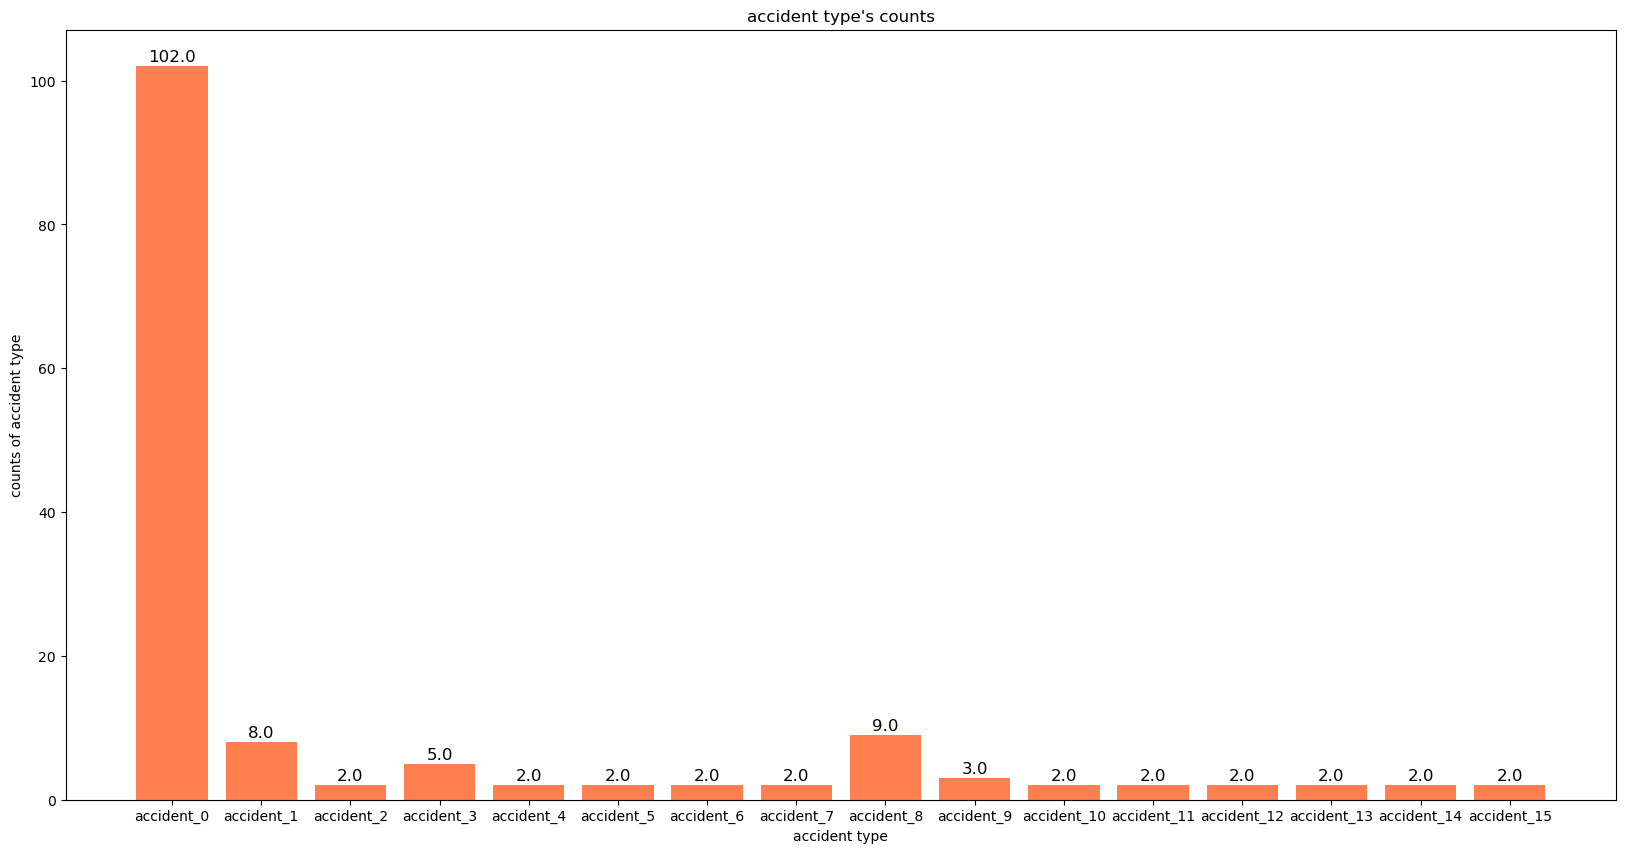

In [31]:
#做圖(長條圖)
#X為不同類型的accident
#y為不同類型的accident隻數量

x = ["accident_"+str(i) for i in range(n_clusters)]
y = [len(accident[i]) for i in range(n_clusters)]

plt.figure(figsize=(20,10))
plt.title("accident type's counts")
plt.xlabel("accident type")
plt.ylabel("counts of accident type")  
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    
plt.bar(x,y,color='coral')

In [32]:
#列出數量最多的群，並觀察
#代表事故最多的原因
print(accident[5][0:20])

[' Tesla kills cyclist ', ' Tesla hits cyclist ']


In [33]:
#列出數量最少的群，並觀察
#代表事故最少的原因
print(accident[1][0:20])

[' Tesla rear ends stopped car ', ' Motorcyclist rear ends Tesla ', ' Tesla rear ends Ford ', ' Tesla rear ends parked fire truck ', ' Tesla rear ended ', ' Kia rear ends Tesla ', ' Honda rear ends Tesla ', ' Tesla crash that ends in fire ']


In [34]:
#設定nltk模組
#欲歸類相同字詞

#3.分類詞性
#(1)使用 pos_tag 進行詞性標註
#(2)依NLTK POS Tag List歸類
#WordNet是面向語義的英語詞典，類似與傳統辭典，但具有更豐富的結構。
#NLTK中包括英語WordNet，共有155,287個詞和117,659個同義詞集合。
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1]                                        
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#2.將字詞的變化還原
#(1)使用 tokenize 進行斷詞(比split好用)
#(2)wnl.lemmatize詞性還原
def lemmatize_text(text):
    wnl = WordNetLemmatizer()                                                               
    return [wnl.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]
    
#1.讀取資料，並整理，再使用上述的functions
#value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值
#選取其index(也就是被刪掉重複的原本"description"之內容)，並以list傳出
data = df[" Description "].value_counts().index
lemmatized_data = [lemmatize_text(text) for text in data]

#整理單詞
#TFIDF是種將文字轉換為向量的方式。
#TFIDF分成兩個部份，TF和IDF。分別表示詞頻（term frequency，tf）和逆向檔案頻率（inverse document frequency，idf）。

#1.TFIDF用以找到文件當中的關鍵字。並去除無意義單詞(ex.the)
#2.自訂stop_words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
book=["Tesla","car","into","off","out","of","on"]
my_stop_words = text.ENGLISH_STOP_WORDS.union(book)
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)
# vectorizer = TfidfVectorizer(stop_words='english')#去除停用詞
X = vectorizer.fit_transform([' '.join(text) for text in lemmatized_data])#用空白隔開字串(strings)
print(X.shape)

#去除相差太多的資料
#因發現原本只使用kmeans誤差有點多，經過去除特異值後，有些許改善

#1.利用LocalOutlierFactor查找Outlier
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)
a = lof.fit_predict(X)

#2.利用布林值建立non_outlier_list與outlier_list
non_outlier_list = np.array([True if i == 1 else False for i in a])
outlier_list = np.array([True if not i else False for i in non_outlier_list])

#3.指定X(排除後的資料)與data(排除後的資料)
X = X[non_outlier_list]
data = data[non_outlier_list]
print(X.shape)

(248, 245)
(245, 245)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['tesla'] not in stop_words.
  % sorted(inconsistent)


In [35]:
from sklearn.cluster import AffinityPropagation
import numpy as np

clusters = AffinityPropagation(damping=0.85,random_state=5).fit_predict(X)

n_clusters = max(clusters+1)
print(n_clusters)

print(clusters)

36
[ 3  0 17 15  4  1  2  3  6  4 28  5 21  2 24  1  5 15 15  6 10 35 27 35
 19  0  0 32  8 26 31 30  4  8 25 32 11  3 28 18 32 32 30 29  1 33  1 23
 30 25 30  8 25 32 29  7  8 23  9  8 22 25 25 14  8  0  8 25 19 18 15 20
 32 18  9 33  4 28  0 10 11 20 12 14 13 14 34 15 20  5 14  5 10 11 16 32
  2  2 20 17 17 15 35  5 20 22 20 17 19  2 19  5 10 18 20 15 29  4 32 19
 19 20 20 28 27 32  0 35  3 28 17  3  4 21  7 32  3 27  6 22 32  4 22 22
 26 23 35 24 25  1 32 27 26 27 34 27  8 27 30 28 32 22  3 32 29  9 18 30
 32 22 30  0  0 29 32  9 32 33 30 26 25 22 31  6 32 32 27 18 24  3 30 32
 27 22  2 26  3 22 26 30 32  0 19  3 25  8 23 32 31  8 25 32 32 33  2  1
 24 20  3 27  6 27 23 24  2 32  9 15  2 26 34  2 23  0 17  1 25 29  0  2
  1 24 25 32 35]


In [36]:
#貼上cluster欄位
#整理資料

df.loc[:, "cluster"] = 0
for i, item in enumerate(df[" Description "]):
    for cluster, phrase in zip(clusters, data):
        if phrase == item:
            df["cluster"][i] = cluster
            break
            
            
#查找再n_clusters裡的同一值
#把同一cluster值拽出來

#1.幫accident建立n_clusters個list
accident = [ [] for i in range(n_clusters)]

#2.刪去-1值(代表非群體，kmeans法中沒有-1)
#3.n_cluster裡面的值
accident_outlier = []
for i, cluster in enumerate(clusters):
    if cluster >=0:
        accident[cluster].append(data[i])
    else:
        accident_outlier.append(data[i])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<BarContainer object of 36 artists>

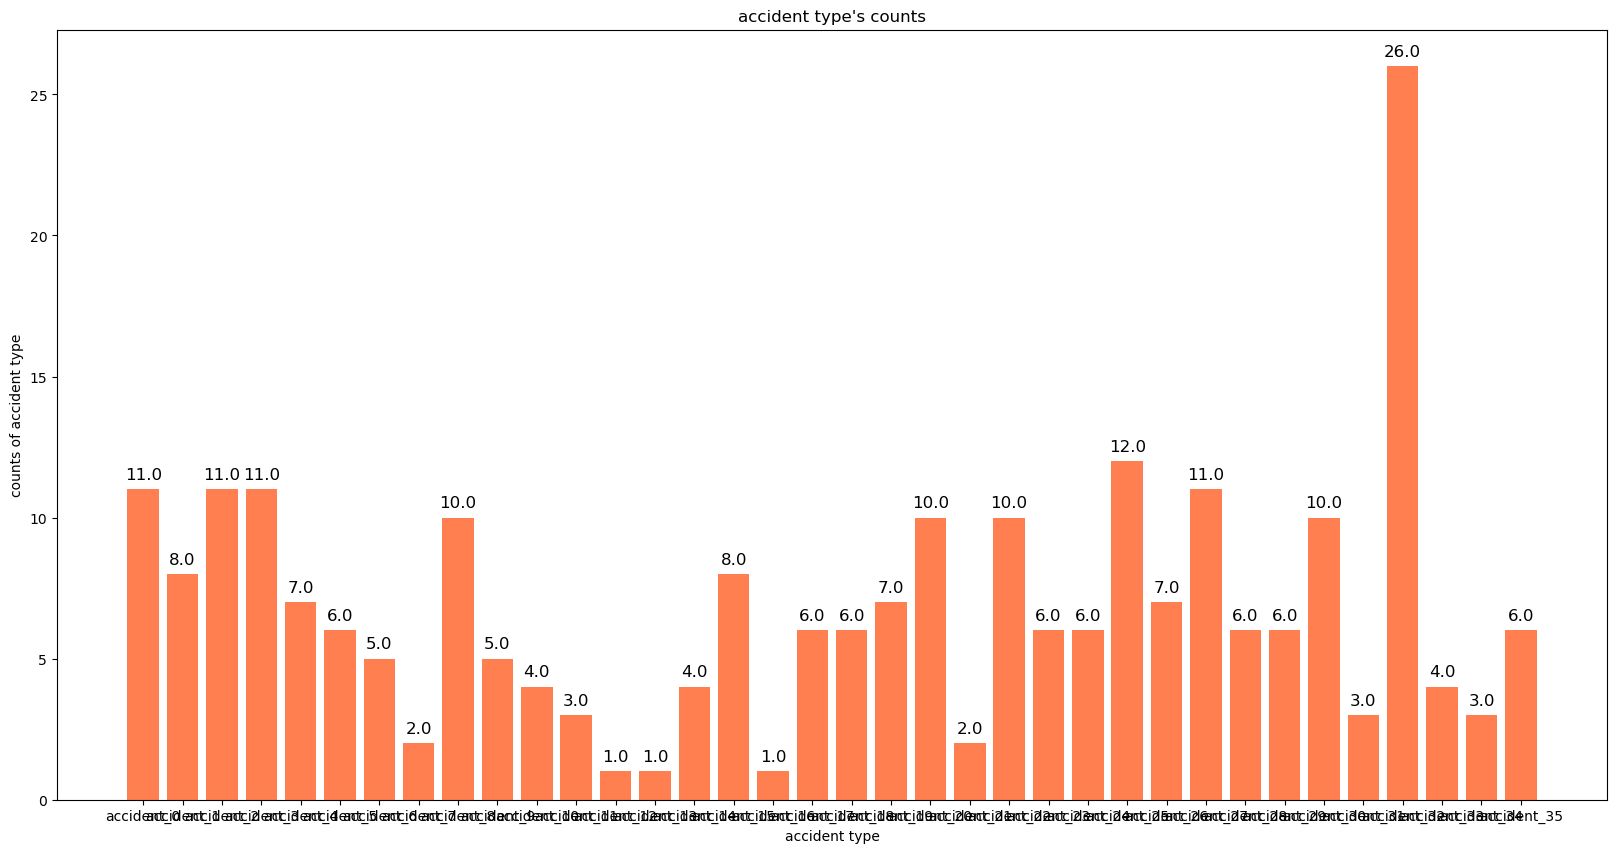

In [37]:
#做圖(長條圖)
#X為不同類型的accident
#y為不同類型的accident隻數量

x = ["accident_"+str(i) for i in range(n_clusters)]
y = [len(accident[i]) for i in range(n_clusters)]

plt.figure(figsize=(20,10))
plt.title("accident type's counts")
plt.xlabel("accident type")
plt.ylabel("counts of accident type")  
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
    
plt.bar(x,y,color='coral')

In [38]:
#列出數量最多的群，並觀察
#代表事故最多的原因
print(accident[5][0:20])

[' Drunk driver strikes Tesla ', ' Wrong way driver strikes Tesla ', ' Nissan Altima wrong way into Tesla ', ' Chevy Cobalt wrong way into Tesla ', ' Tesla strikes divider, driver falls to death ', ' Wrong way driver strikes Tesla, Tesla burns ']


In [39]:
#列出數量最少的群，並觀察
#代表事故最少的原因
print(accident[1][0:20])

[' Tesla crashes into tree ', ' Tesla crashes into tree, occupants killed ', ' Tesla crashes into tree, bursts into fire ', ' Tesla crashes into tree with 5 occupants ', ' Speeding tesla crashes into tree ', ' Tesla crashes into trees, flames erupt ', ' Tesla crashes into a tree ', ' Tesla crashes into trees ']


In [40]:


dff = df.reset_index()[' Deaths ']


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(dff).reshape(-1,1))

from sklearn.model_selection import train_test_split
X = df1
y = df1
train_data, test_data, _, _ = train_test_split(X,y,test_size=0.3, shuffle=False)

def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


#LSTM魔法陣
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))#input10,output50
model.add(LSTM(50,return_sequences=True))#output50，input來自前面
model.add(LSTM(50))#output50，input來自前面


model.add(Dense(1))#收斂為1
model.compile(loss='mean_squared_error',optimizer='adam')#

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

2023-02-20 14:30:42.583505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-20 14:30:42.583555: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/60
4/4 [==============================] - 6s 368ms/step - loss: 0.0417 - val_loss: 0.0134
Epoch 2/60
4/4 [==============================] - 0s 23ms/step - loss: 0.0384 - val_loss: 0.0162
Epoch 3/60
4/4 [==============================] - 0s 22ms/step - loss: 0.0384 - val_loss: 0.0160
Epoch 4/60
4/4 [==============================] - 0s 22ms/step - loss: 0.0380 - val_loss: 0.0138
Epoch 5/60
4/4 [==============================] - 0s 21ms/step - loss: 0.0384 - val_loss: 0.0132
Epoch 6/60
4/4 [==============================] - 0s 20ms/step - loss: 0.0389 - val_loss: 0.0131
Epoch 7/60
4/4 [==============================] - 0s 23ms/step - loss: 0.0388 - val_loss: 0.0135
Epoch 8/60
4/4 [==============================] - 0s 22ms/step - loss: 0.0381 - val_loss: 0.0145
Epoch 9/60
4/4 [==============================] - 0s 22ms/step - loss: 0.0378 - val_loss: 0.0150
Epoch 10/60
4/4 [==============================] - 0s 20ms/step - loss: 0.0376 - val_loss: 0.0148
Epoch 11/60
4/4 [===========

In [42]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

3/3 [==============================] - 0s 4ms/step


1.2309658020440846

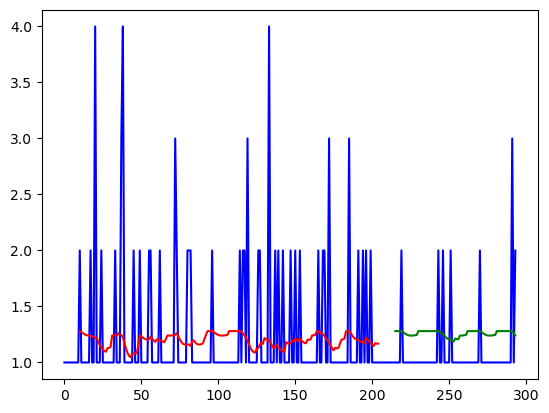

In [43]:
### Plotting 
# shift train predictions for plotting
time_step=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict#平移
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2):len(df1), :] = test_predict


# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1),'blue')
plt.plot(trainPredictPlot,'red')
plt.plot(testPredictPlot,'green')
plt.show()

In [44]:
#無法預測，沒有趨勢
#故只會在平均值盤旋